In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD


Using TensorFlow backend.


In [4]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [6]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [7]:
model_2 = Sequential()
model_2.add(Dense(512, input_dim=784 )) #第一層512個神經原
model_2.add(Activation('sigmoid'))
model_2.add(Dense(256)) #第二層256個神經原
model_2.add(Activation('sigmoid'))
model_2.add(Dense(10)) #輸出層
model_2.add(Activation('softmax'))
model_2.compile(loss='mse', optimizer=SGD(lr=0.067843),
                metrics=['accuracy']) #mse mean square error
model_2.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 

In [8]:
model = model_2.fit(x_train,y_train,batch_size=100,epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0843 - acc: 0.3241
Epoch 2/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0700 - acc: 0.5550
Epoch 3/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.0568 - acc: 0.6768 0s - loss: 0.0573 
Epoch 4/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0458 - acc: 0.7593
Epoch 5/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.0377 - acc: 0.7964
Epoch 6/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.0317 - acc: 0.8333
Epoch 7/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.0270 - acc: 0.8693
Epoch 8/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0235 - acc: 0.8856
Epoch 9/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0210 - acc: 0.8940
Epoch 10/20
60000/60000 

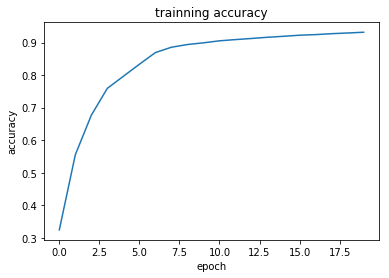

In [12]:
plt.plot(model.history["acc"])
plt.title("trainning accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.show()

In [13]:
score = model_2.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 262us/step


In [15]:
print('loss:',score[0])
print('正確率:',score[1])

loss: 0.012752127534337342
正確率: 0.9225


#### 原先老師上課示範的，第一層為4個，第二層為2個的神經網路，在我的電腦只能跑到20%左右的acc 
#### 而增加神經原，第一層為512個，第二層為256個，可以大幅提升acc
